# Week 1
- Assign one group rep
- Explore 3 data sets from at least two sources. Discuss them among your groups, compare similarities and differences
- Choose one data set out of those 3, discuss reasons, pros and cons

## 1. Group Rep
Martin

## 2. Explore 3 data sets
First, we decided to work on image classification. The reason for choosing image classfication for our portfolio is that, 
 - We can try to apply various algorithms; classification algorithms, PCA, neural network, and so on. 
 - We can practice how to process image to structured data 

### 2-1. Explore 3 data sets
After exploring www.kaggle.com and https://datasetsearch.research.google.com/ to find specific data sets to work on, we found three candidates as our data sets.
- The first one is 'Wildlife Animals Images' with six categories and 350 images each. 
- The second one is 'Waste Classification' with two categories and enough images each. 
- The last one is 'Fashion product' with mulutiple labels on a sample. 

### 2-2. Dicussions

All of these have enough number of images. The difference is classification type; the wildlife animals dataset has a multiple categories, the waste classification dataset is binary classification problem, and the fasion product is multi label classification. 

## 3. Choose one data set

Decide after discussing with George -> **waste image classification**

In [1]:
import kaggle

In [2]:
!kaggle datasets download -d techsash/waste-classification-data

waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


# Week 2
- Get insights on the data attributes and guides in choosing suitable features using visualization and initial data exploration. Show how this helped you learn more about the data.
- Discuss how you fixed problems like missing values, errors or outliers - if applicable. 
- If any pre-processing or normalization procedures applied, explain why. (Show you know and understand pre-processing and normalizaion methods)

## Setup

In [3]:
# if needed
# pip install opencv-python

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from zipfile import ZipFile
import cv2

## 1. Explore data

In [5]:
# unzip file (downloaded file located in the same folder as the notebook) 
zip_file_name = 'waste-classification-data'
with ZipFile(zip_file_name+'.zip', 'r') as files:
    files.extractall(zip_file_name)

In [6]:
# get list of image file names 
train_image_dir = os.path.join('waste-classification-data', 'DATASET', 'TRAIN')
organic_train_dir = os.path.join(train_image_dir, 'O')
recyclable_train_dir = os.path.join(train_image_dir, 'R')
organic_train = os.listdir(organic_train_dir)
recyclable_train = os.listdir(recyclable_train_dir)
print("Number of organic (O) images in training set: ", len(organic_train))
print("Number of recyclable (R) images in training set: ", len(recyclable_train))

Number of organic (O) images in training set:  12565
Number of recyclable (R) images in training set:  9999


## 1-1. Explore image dimensions 
- need to decide new shape when processing image

In [7]:
pixels = []

# process organic data
for file in organic_train: 
    file_name = os.path.join(organic_train_dir, file)
    image_wc = cv2.imread(file_name, cv2.IMREAD_COLOR)
    pixel = image_wc.shape[:2]
    pixels.append(pixel)

# process recyclable data
for file in recyclable_train:
    file_name = os.path.join(recyclable_train_dir, file)
    image_wc = cv2.imread(file_name, cv2.IMREAD_COLOR)
    pixel = image_wc.shape[:2]
    pixels.append(pixel)

In [8]:
print("Total number of images in training set: ", len(organic_train)+len(recyclable_train))
print("Length of pixels array: ", len(pixels))
print("The first five pixel data: ", pixels[:5])

Total number of images in training set:  22564
Length of pixels array:  22564
The first five pixel data:  [(242, 208), (183, 275), (183, 275), (209, 242), (186, 271)]


In [9]:
# convert list to pd.DataFrame 
file_names = []
file_names.extend(organic_train)
file_names.extend(recyclable_train)

pixels_df = pd.DataFrame(pixels, columns=['Height', 'Width'], index=file_names)

print(pixels_df.head())

             Height  Width
O_1.jpg         242    208
O_10.jpg        183    275
O_100.jpg       183    275
O_1000.jpg      209    242
O_10000.jpg     186    271


In [10]:
# add third column 
pixels_df['Dimension'] = pixels_df['Height'] * pixels_df['Width']
print(pixels_df.head())

             Height  Width  Dimension
O_1.jpg         242    208      50336
O_10.jpg        183    275      50325
O_100.jpg       183    275      50325
O_1000.jpg      209    242      50578
O_10000.jpg     186    271      50406


### Get data summary

In [11]:
# get statistical summary of pixel data
pixels_df.describe()

,Height,Width,Dimension
count,22564.000000,22564.000000,22564.000000
mean,203.747119,252.316876,50035.128922
std,33.801875,44.218997,2737.416420
min,69.000000,51.000000,17120.000000
25%,183.000000,225.000000,50310.000000
50%,194.000000,259.000000,50400.000000
75%,225.000000,275.000000,50530.000000
max,383.000000,600.000000,50625.000000


In [12]:
# data should be all int (pixel can not be floating number)
pixels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22564 entries, O_1.jpg to R_9999.jpg
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height     22564 non-null  int64
 1   Width      22564 non-null  int64
 2   Dimension  22564 non-null  int64
dtypes: int64(3)
memory usage: 705.1+ KB


### Visualizations

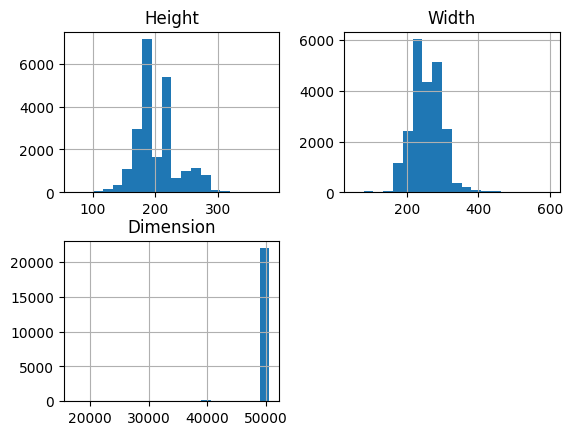

In [13]:
# plot a histogram for each numerical attribute
pixels_df.hist(bins = 20)
plt.show()

<AxesSubplot:xlabel='Width', ylabel='Height'>

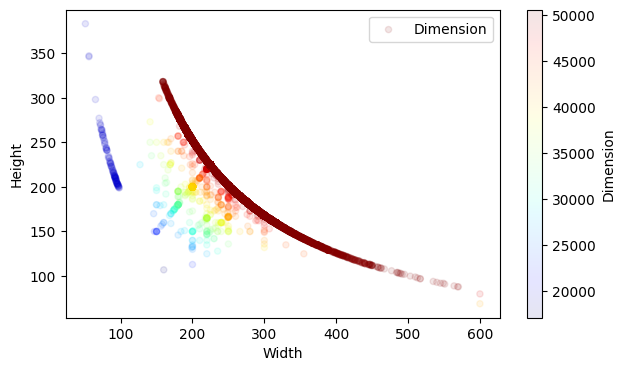

In [14]:
# plot a scatter plot with 'Height' and 'Width'
pixels_df.plot(kind="scatter", x = "Width", y="Height", alpha=0.1, 
              label = "Dimension", figsize=(7, 4), 
              c='Dimension', cmap=plt.get_cmap("jet"), colorbar=True)

### Display Image with highest dimension and image with lowest dimension

In [15]:
# get file name of image with highest dimension and image with lowest dimension 
lowest = pixels_df.index[pixels_df['Dimension'].argmin()]
highest = pixels_df.index[pixels_df['Dimension'].argmax()]

In [16]:
def displayImage(image_name, title):
    # get full path of the image file (depending on the starting letter - 'O' or 'R')
    if image_name.startswith('O'):
        full_path = os.path.join(organic_train_dir, image_name)
    elif image_name.startswith('R'):
        full_path = os.path.join(recyclable_train_dir, image_name)
    # process image - RGB and grays
    image_wc = cv2.imread(full_path, cv2.IMREAD_COLOR)
    image_tc = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2RGB)
    image_tc_bw = cv2.cvtColor(src=image_wc, code=cv2.COLOR_RGB2GRAY)
    # display RGB image and gray image
    fig, axis = plt.subplots(nrows=1, ncols=2)
    axis[0].imshow(image_tc)
    axis[0].set_title('RGB: True color')
    axis[1].imshow(image_tc_bw)
    axis[1].set_title('Grey-scale')
    fig.suptitle(title)
    plt.show()

In [17]:
print(lowest)
print(f"The image with lowest dimension has {pixels_df.loc[lowest]['Height']} * {pixels_df.loc[lowest]['Width']} pixels.")

O_4933.jpg
The image with lowest dimension has 107 * 160 pixels.


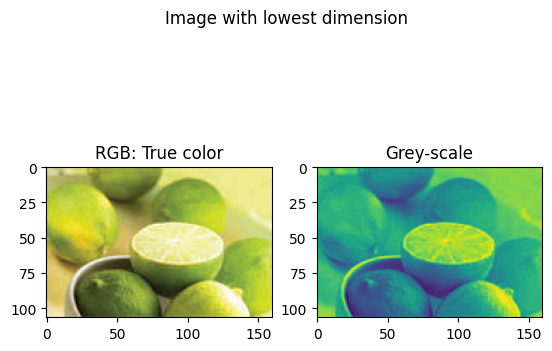

In [18]:
displayImage(lowest, 'Image with lowest dimension')

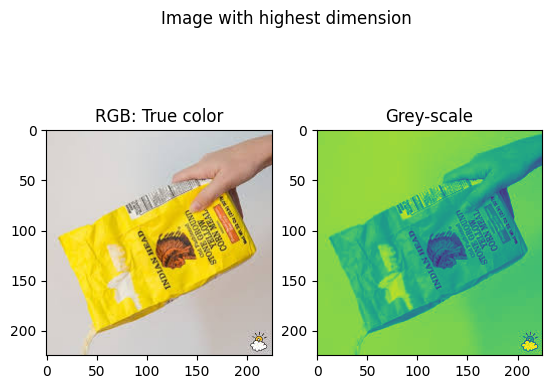

In [19]:
displayImage(highest, 'Image with highest dimension')

## 1-2. Raw comparison

In [20]:
# randomly select three images each
organic_random = np.random.choice(organic_train, 3, replace=False)
recyclable_random = np.random.choice(recyclable_train, 3, replace=False)

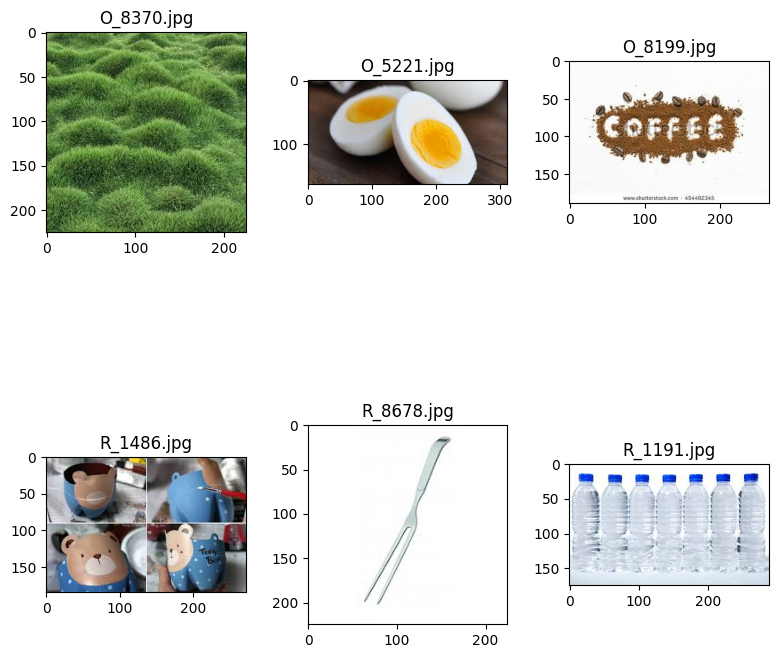

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
fig.tight_layout()
for i, image in enumerate(organic_random):
    # get full path of the image
    full_path = os.path.join(organic_train_dir, image)
    # process image - RGB and grays
    image_wc = cv2.imread(full_path, cv2.IMREAD_COLOR)
    image_tc = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2RGB)
    axis[0][i].imshow(image_tc)
    axis[0][i].set_title(image)

for i, image in enumerate(recyclable_random):
    # get full path of the image
    full_path = os.path.join(recyclable_train_dir, image)
    # process image - RGB and grays
    image_wc = cv2.imread(full_path, cv2.IMREAD_COLOR)
    image_tc = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2RGB)
    axis[1][i].imshow(image_tc)
    axis[1][i].set_title(image)
    
plt.show()


### 1-3. Process image as RGB pixels (64 * 64 * 3) and Grays (64 * 64) 

In [22]:
# use (64 * 64) as a new shape
new_shape = (64, 64)

# define function 
def get_fullpath(image_name):
    if image_name.startswith('O'):
        full_path = os.path.join(organic_train_dir, image_name)
    elif image_name.startswith('R'):
        full_path = os.path.join(recyclable_train_dir, image_name)
    return full_path

images = []
images_bw = []
# takes file_name with full path and desired shape as parameter
for file in file_names:
    full_path = get_fullpath(file)    
    image_wc = cv2.imread(full_path, cv2.IMREAD_COLOR)
    image_tc = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2RGB)
    image_tc_bw = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2GRAY)
    # resize image
    image_tc_rs = cv2.resize(src=image_tc, dsize=new_shape)
    image_tc_bw_rs = cv2.resize(src=image_tc_bw, dsize=new_shape)
    # store image
    images.append(image_tc_rs)
    images_bw.append(image_tc_bw_rs)

In [23]:
# define labels for images (0 for organic, 1 for recyclable)
labels = [0] * len(organic_train)
labels.extend([1] * len(recyclable_train))

# stack images to a single array
images_arr = np.stack(images)
images_bw_arr = np.stack(images_bw)
print("images_arr: ", images_arr.shape)
print("images_bw_arr: ", images_bw_arr.shape)

# convert to pd.DataFrame
features_rgb = images_arr.reshape(len(images_arr), -1)
df_rgb = pd.DataFrame(data=features_rgb, index = file_names, 
                 columns = ['pixels_'+str(i+1) for i in range(features_rgb.shape[1])])
features_gray = images_bw_arr.reshape(len(images_bw_arr), -1)
df_gray = pd.DataFrame(data = features_gray, index = file_names, 
                      columns = ['pixels_'+str(i+1) for i in range(features_gray.shape[1])])
print(df_rgb.head())
print(df_gray.head())

images_arr:  (22564, 64, 64, 3)
images_bw_arr:  (22564, 64, 64)
             pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  \
O_1.jpg           255       255       255       255       255       255   
O_10.jpg          241       242       247       241       242       247   
O_100.jpg         240       240       240       254       254       254   
O_1000.jpg        255       255       255       255       255       255   
O_10000.jpg         0         0         0         0         0         0   

             pixels_7  pixels_8  pixels_9  pixels_10  ...  pixels_12279  \
O_1.jpg           255       255       255        255  ...           255   
O_10.jpg          243       242       248        243  ...           249   
O_100.jpg         255       255       255        255  ...           255   
O_1000.jpg        255       255       255        255  ...           255   
O_10000.jpg         0         0         0          0  ...             3   

             pixels_12280  pixels_

In [24]:
print(df_rgb.info())
print(df_gray.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22564 entries, O_1.jpg to R_9999.jpg
Columns: 12288 entries, pixels_1 to pixels_12288
dtypes: uint8(12288)
memory usage: 264.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 22564 entries, O_1.jpg to R_9999.jpg
Columns: 4096 entries, pixels_1 to pixels_4096
dtypes: uint8(4096)
memory usage: 88.3+ MB
None


In [25]:
# make a new dataframe with labels
df_rgb_with_labels = df_rgb.copy()
df_rgb_with_labels['label'] = labels
df_gray_with_labels = df_gray.copy()
df_gray_with_labels['label'] = labels
print("df_rgb and df_gray have shape of: ", df_rgb.shape, df_gray.shape)
print("df_rgb_with_labels and df_gray_with_labels have shape of: ", df_rgb_with_labels.shape, df_gray_with_labels.shape)

df_rgb and df_gray have shape of:  (22564, 12288) (22564, 4096)
df_rgb_with_labels and df_gray_with_labels have shape of:  (22564, 12289) (22564, 4097)


In [26]:
%store df_rgb
%store df_gray
%store df_rgb_with_labels
%store df_gray_with_labels

Stored 'df_rgb' (DataFrame)
Stored 'df_gray' (DataFrame)
Stored 'df_rgb_with_labels' (DataFrame)
Stored 'df_gray_with_labels' (DataFrame)


## 2. Normalization and Analysis

## 2-1. Normalize features before analysis

In [27]:
# load dataframes if needed (Uncomment belows)
%store -r df_rgb
%store -r df_gray
%store -r df_rgb_with_labels
%store -r df_gray_with_labels

In [28]:
# normalize pixels in dataframes
import sklearn.preprocessing as preprocessing
mmscaler_rgb = preprocessing.MinMaxScaler()
mmscaler_gray = preprocessing.MinMaxScaler()
df_rgb_scaled = pd.DataFrame(mmscaler_rgb.fit_transform(df_rgb), columns=df_rgb.columns, index=df_rgb.index)
df_gray_scaled = pd.DataFrame(mmscaler_gray.fit_transform(df_gray), columns=df_gray.columns, index=df_gray.index)
print(mmscaler_rgb.scale_.shape)
print(mmscaler_gray.scale_.shape)

(12288,)
(4096,)


In [29]:
# dataframe with labels & normalised
df_rgb_scaled_with_labels = df_rgb_scaled.copy()
df_gray_scaled_with_labels = df_gray_scaled.copy()
df_rgb_scaled_with_labels['label'] = df_rgb_with_labels['label']
df_gray_scaled_with_labels['label'] = df_gray_with_labels['label']

## 2-2. Analysis data to decide which features to use in our model

### Correlation analysis - using RGB

In [30]:
# use pd.corrwith() method to see correlation between features(pixels) and class
# (corr() method takes forever)
labels = [0] * len(organic_train)
labels.extend([1] * len(recyclable_train))
labels = pd.Series(labels)
rgb_corr = df_rgb_scaled.corrwith(labels, method='pearson')
rgb_corr_abs = np.abs(rgb_corr)
print(rgb_corr.shape)

(12288,)


In [31]:
rgb_corr.sort_values(ascending=False)

pixels_1       NaN
pixels_2       NaN
pixels_3       NaN
pixels_4       NaN
pixels_5       NaN
                ..
pixels_12284   NaN
pixels_12285   NaN
pixels_12286   NaN
pixels_12287   NaN
pixels_12288   NaN
Length: 12288, dtype: float64

### PCA (Principal Component Analysis)

In [32]:
from sklearn.decomposition import PCA
pca = PCA()

In [33]:
# apply PCA 
df_rgb_scaled_reduced = pca.fit_transform(df_rgb_scaled)

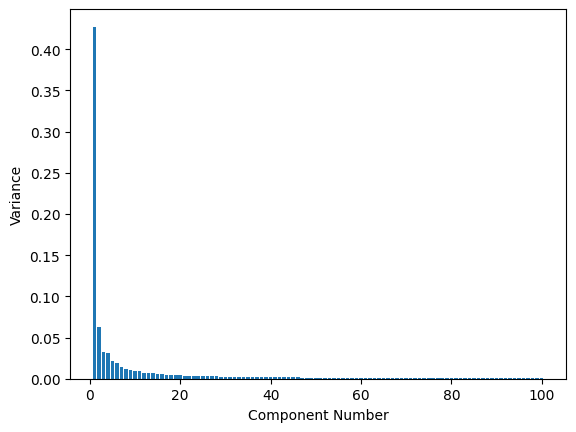

In [35]:
# plot the explained_variance_ratio 
# after 50th components, the ratio is very small
plt.ylabel('Variance')
plt.xlabel('Component Number')
plt.bar(np.arange(100) + 1, pca.explained_variance_ratio_[:100])
plt.show()

In [36]:
# compute accumulted ratio of explained variance
ratio_acc = [sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))]
# find how many compoments need to get 85%, 90%, 95%, 99%
def find_n_components(ratio):    
    for i in range(len(ratio_acc)):
        if ratio_acc[i] > ratio:
            return i+1
print(f"Among {pca.n_components_} number of components, ")
print(f"85% variance explained, With {find_n_components(.85)} components.")  
print(f"90% variance explained, With {find_n_components(.90)} components.")  
print(f"95% variance explained, With {find_n_components(.95)} components.")  
print(f"99% variance explained, With {find_n_components(.99)} components.")  

Among 12288 number of components, 
85% variance explained, With 189 components.
90% variance explained, With 482 components.
95% variance explained, With 1368 components.
99% variance explained, With 3777 components.


## 3. Preprocessing - discard features

## 4. Discussions

### Discussion topics
1. about conversion images from .jpg to dataframe
    - When converting images to pixel numbers, we discussed on how to choose dimension of our dataset. We first decided to make all images to the size of the smallest one, and after exploring image pixel data we found that the smallest image is still large (160 * 107), so we decided to reduce all the images to (64 * 64) size so that we can apply learning algorithms more efficiently. 
    - Also we talked about ratio of height and width, we concluded that ratio does not matter

2. about data exploration analysis
    - Regarding that we have 64 * 64 features in Gray pixels data and 64 * 64 * 3 features in RGB pixels data, we decided to explore data to dicide which features to use and which features to discard for more efficient learning.
    - The first analysis we tried is to use pd.corr() method to see if any specific feature is more relevant to the class value. We were planning to discard any feature with abs(correlation) < 0.5. However, all the correlation turns out to be NaN. We suspect that this is because our target value is binary (not continuous), but we need more research. 
    - The second analysis we tried is principle components analysis(PCA). We found that among 12288 features (RGB dataset) only with 189 components 85% variance explained. 482 components explain 90% variance, 1368 components explain 95 variance, and 3777 components explain 99% variance. 
    - We are planning to use our discoveries in choosing features.

3. about pre-processing or normalization 
    - We did not have to deal with missing values because our dataset is processed from image using cv2.
    - We used sklearn MinMaxScaler to normalise our data.

# Week 3
**To-do**
1. Analyse most correlating features/attributes of the data set
  1) Using **cv2.resize**
  2) Using **Correlation analysis**
  3) Using **PCA** (Basic one)

2. Use Pearson's r method to conduct correlation coefficient analysis
3. Study what other feature selection algorithms are available? 
    -   1) PCA
    -   2) Down-sampling using **cv2.resize** 

4. Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these data sets.
    - SGDClassifier or
    - RandomForestClassifier

5. Add three data sets to portfolio   

In [1]:
# setup
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from zipfile import ZipFile
import cv2

# load data
%store -r df_rgb_with_labels
X_train = df_rgb_with_labels.iloc[:, :-1]
y_train = df_rgb_with_labels.iloc[:, -1]
print(X_train.shape, y_train.shape)

(22564, 12288) (22564,)


In [2]:
# normalize data
import sklearn.preprocessing as preprocessing
mmscaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(mmscaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
print(mmscaler.scale_.shape)

(12288,)


## 1. Correlation Coefficient Analysis
- Using *Pearson's r* Correlation Coefficient Method

In [3]:
rgb_corr = X_train_scaled.corrwith(y_train, method='pearson')
rgb_corr_abs = np.abs(rgb_corr)
print(rgb_corr.shape)

(12288,)


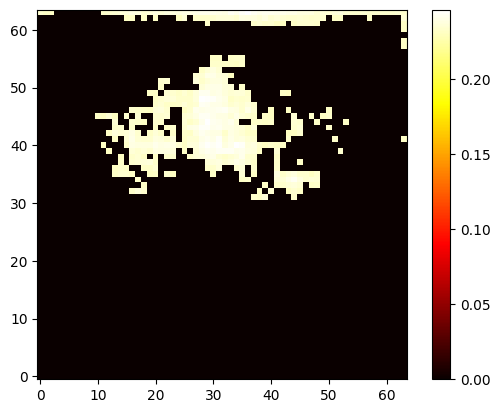

In [4]:
corr_average = []

# take the average of every 3 pixels
for i in range(0, len(rgb_corr_abs), 3):
    corr_average.append(np.mean(rgb_corr_abs[i:i+3]))

# take indices from the best 500 pixels
corr_best = np.array(corr_average)
corr_best = np.argsort(corr_average)[::-1][:500]
best_cols = []
for col in corr_best:
    best_cols.append(col)
    best_cols.append(col+1)
    best_cols.append(col+2)
    
# get the best 500 pixels
X_train_scaled_best = X_train_scaled.iloc[:, best_cols]

# remove from corr_average all pixels but best
for i in range(len(corr_average)):
    if i not in corr_best:
        corr_average[i] = 0

# plot the correlation as a heatmap with reversed y axis
corr_average = np.array(corr_average).reshape(64, 64)
plt.imshow(corr_average, cmap='hot')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [5]:
# extrac columns with best correlation
X_train_scaled_best.shape

(22564, 1500)

In [6]:
print(corr_best)
print(len(corr_best))

[2594 2845 4068 3100 3101 2591 2589 4067 2655 2780 2781 2595 3102 2528
 4069 3036 2590 2220 2909 2527 2908 2976 4065 2529 2846 2783 2975 3037
 4072 3164 2653 2716 3165 2525 2588 4071 2847 2973 2971 4070 2467 2910
 4073 2580 4066 4060 2974 2526 3103 4061 2849 4074 2593 2782 4062 2531
 2844 2654 3039 4059 2462 3167 4075 3231 2402 3358 2914 2980 2530 2640
 2582 2652 4063 2717 2219 4076 2524 2779 3038 2972 3230 2657 3357 2721
 2704 4058 4007 2907 2912 2461 4057 4003 2581 3166 2719 2576 2718 4064
 2778 2583 2785 3104 3229 2911 2848 4048 2784 2516 2977 2517 2978 2592
 3295 2518 2284 4055 4049 2281 2221 2579 2577 3040 4005 2644 2597 4004
 4084 4077 4056 2659 4078 4079 2532 2399 3294 3422 2403 4052 4054 2578
 2715 3044 2387 2466 2658 2519 2789 2722 2596 2401 3099 2335 3168 2156
 3359 2065 2645 4047 2460 2587 2398 3232 2786 2533 2586 3163 3291 4009
 2647 2965 4083 2701 2218 2703 2797 2523 3033 4051 2155 2913 2787 2708
 3171 4053 3095 3360 2850 3233 3293 4046 2223 3170 3999 2512 2841 3421
 2915 

## 2. Other Feature Selection Algorithms
### 2-1. PCA

In [7]:
# Initialize PCA with number of components such that at least 95% of variance explained
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [ ]:
# apply PCA 
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
%store pca
%store X_train_pca

In [8]:
%store -r pca
%store -r X_train_pca

In [9]:
print("The number of components: ", pca.n_components_)
print("The shape of X_train_pca (reduced): ", X_train_pca.shape)

The number of components:  1368
The shape of X_train_pca (reduced):  (22564, 1368)


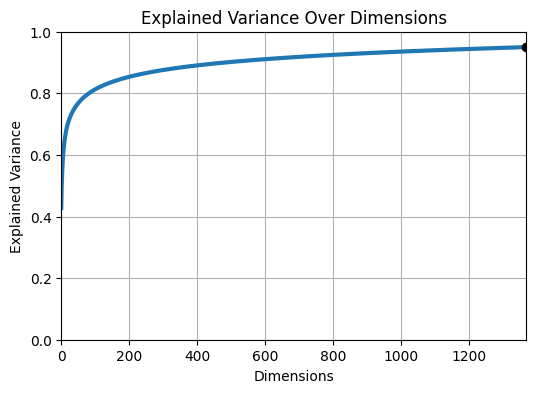

In [10]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, pca.n_components_, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot(pca.n_components_, 0.95, "ko")
plt.title("Explained Variance Over Dimensions")
plt.grid(True)
plt.show()

In [11]:
# display image
def plot_image(data, title):
    size = np.sqrt(data.shape[1] // 3)
    image = data.reshape(size, size, 3)
    plt.imshow(image)

def plot_two_image(data, subtitle1, subtitle2, suptitle):
    size = int(np.sqrt(data.shape[1] // 3))
    image1 = data[0].reshape((size, size, 3))
    image2 = data[1].reshape((size, size, 3))    
    fig, axis = plt.subplots(nrows=1, ncols=2)
    axis[0].imshow(image1)
    axis[0].set_title(subtitle1)
    axis[1].imshow(image2)
    axis[1].set_title(subtitle2)
    fig.suptitle(suptitle, y=0.85)
    plt.show()

In [12]:
# display random image 
original = X_train_scaled.iloc[1000, :]
reduced = pca.inverse_transform(X_train_pca[1000, :])
print(original.shape, reduced.shape)

(12288,) (12288,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


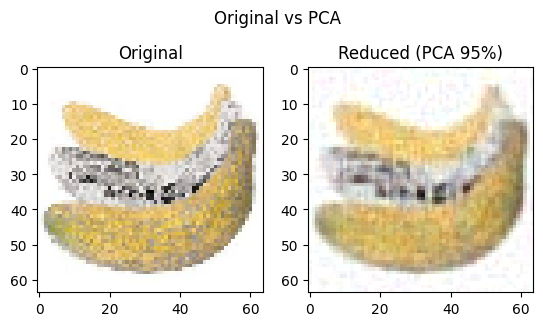

In [13]:
data = np.append([original], [reduced], axis=0)
plot_two_image(data, "Original", "Reduced (PCA 95%)", "Original vs PCA")

### 2-2. Down-sampling using cv2.resize()
down_size = (22, 22, 3) ===> 22 * 22 * 3 = 1,452 (95% variance explained with 1,368 components using PCA)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


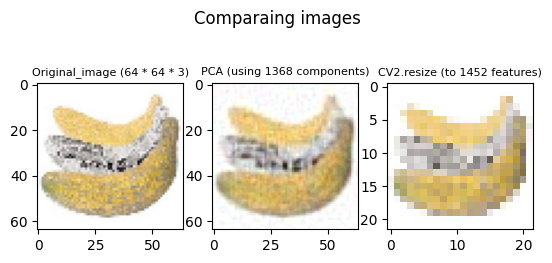

In [14]:
# plot random image
img_org = np.array(X_train_scaled.iloc[1000, :]).reshape((64, 64, 3))
img_pca = pca.inverse_transform(X_train_pca[1000, :]).reshape((64, 64, 3))
img_resize = cv2.resize(img_org, dsize=(22, 22))
fig, axis = plt.subplots(nrows=1, ncols=3)
axis[0].imshow(img_org)
axis[0].set_title("Original_image (64 * 64 * 3)", fontsize=8)
axis[1].imshow(img_pca)
axis[1].set_title("PCA (using 1368 components)", fontsize=8)
axis[2].imshow(img_resize)
axis[2].set_title("CV2.resize (to 1452 features)", fontsize=8)

fig.suptitle("Comparaing images", y=0.8)
plt.show()

In [15]:
# downsize all samples
X_train_sm = np.apply_along_axis(func1d=lambda img: cv2.resize(img.reshape(64, 64, 3), dsize=(22, 22)), axis=1, arr=X_train_scaled).reshape(-1, 22*22*3)

## 3. Three Data Sets 

In [16]:
# Top pixels with correlation coefficient 1,500 columns)
data_1 = X_train_scaled_best
# Dimentionality reduction using pca (1,368 columns)
data_2 = X_train_pca
# cv2.resize() to 22*22*3 (1,452 columns)
data_3 = X_train_sm

In [18]:
# %store X_train        ## store original data (22564 * 12288)
# %store y_train        ## store label
# %store data_1         ## feature selection 1 - correlation anaylsis (22564 * 1500)
#%store data_2          ## feature selection 2 - pca (22564 * 1368)
#%store data_3          ## feature selection 3 - down-sampling using cv2.resize() (22564 * 1452)
#%store pca             ## store pca object

In [19]:
%store X_train    
%store y_train    
%store data_1     
%store data_2     
%store data_3     
%store pca        

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'data_1' (DataFrame)
Stored 'data_2' (ndarray)
Stored 'data_3' (ndarray)
Stored 'pca' (PCA)


## 4. Run a Classifier to Analyze Accuracy of Data sets

In [7]:
%store -r X_train
%store -r y_train
%store -r data_1
%store -r data_2
%store -r data_3
%store -r pca

### 4-1. Sochastic Gradient Descent Classifier

#### cross_val_score

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
# test original dataset
sgd_orig = SGDClassifier(max_iter=1000, tol=1e-3)
s_orig = cross_val_score(sgd_orig, X_train, y_train, cv=10, scoring="accuracy")

In [36]:
# test data 1 (high correlation)
sgd_1 = SGDClassifier(max_iter=1000, tol=1e-3)
s_1 = cross_val_score(sgd_1, data_1, y_train, cv=10, scoring="accuracy")

In [37]:
# test data 2 (PCA)
sgd_2 = SGDClassifier(max_iter=1000, tol=1e-3)
s_2 = cross_val_score(sgd_2, data_2, y_train, cv=10, scoring="accuracy")

In [38]:
# test data 3 (cv2.resize())
sgd_3 = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_3.fit(X_train_3, y_train_3)
s_3 = cross_val_score(sgd_3, data_3, y_train, cv=10, scoring="accuracy")

In [39]:
print("Three cross_val_score on original dataset           : \n", s_orig, "with mean: ", s_orig.mean())
print("Three cross_val_score on sub-dataset 1 (correlation): \n", s_1, "with mean: ", s_1.mean())
print("Three cross_val_score on sub-dataset 2 (PCA)        : \n", s_2, "with mean: ", s_2.mean())
print("Three cross_val_score on sub-dataset 3 (resize)     : \n", s_3, "with mean: ", s_3.mean())

Three cross_val_score on original dataset           : 
 [0.78112539 0.6127603  0.72662827 0.64953478 0.69946809 0.72606383
 0.67730496 0.68705674 0.77083333 0.71586879] with mean:  0.7046644481942703
Three cross_val_score on sub-dataset 1 (correlation): 
 [0.74745237 0.7027027  0.73947718 0.68542313 0.81648936 0.69547872
 0.68439716 0.71985816 0.78856383 0.75177305] with mean:  0.7331615666940049
Three cross_val_score on sub-dataset 2 (PCA)        : 
 [0.80948161 0.66681436 0.75409836 0.69871511 0.63785461 0.74468085
 0.70390071 0.69281915 0.81560284 0.73005319] with mean:  0.725402078482389
Three cross_val_score on sub-dataset 3 (resize)     : 
 [0.80948161 0.65086398 0.7966327  0.66681436 0.82180851 0.70035461
 0.70744681 0.61303191 0.85815603 0.76374113] with mean:  0.7388331652196319


Text(0, 0.5, 'Cross Validation Score')

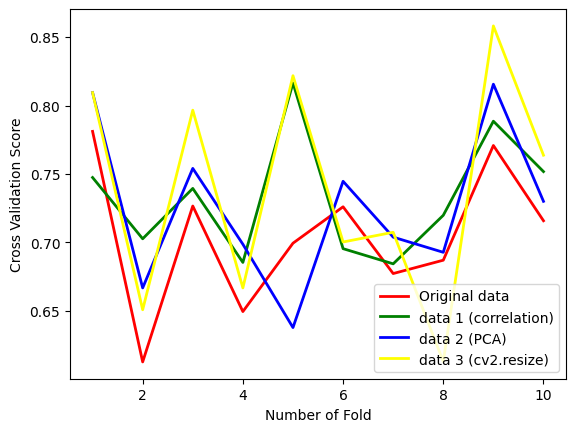

In [40]:
# plot scores
x = np.linspace(1, 10, 10)
plt.plot(x, s_orig, color='red', label='Original data', linewidth=2)
plt.plot(x, s_1, color='green', label='data 1 (correlation)', linewidth=2)
plt.plot(x, s_2, color='blue', label='data 2 (PCA)', linewidth=2)
plt.plot(x, s_3, color='yellow', label='data 3 (cv2.resize)', linewidth=2)
plt.legend()
plt.xlabel("Number of Fold")
plt.ylabel("Cross Validation Score")

## 5. Discussions

### 1) Using the methods explained in lectures and tutorials (or additional sources), analyse most correlating features/attributes of the data set.
We added three data sets on our portfolio after analyzing features.
    1. dataset 1: We used Pearson's r correlation method to see which pixels are most relevant. We applied pandas `corrwith()` method on all the columns (12,288 columns) and chose 500 pixels with highest mean (RGB) correlation. Finally, We decided to use 1,500 columns corresponding to the 500 top pixels. Also, by plotting the correlation values, we could find that most relating parts in the image are located in the center and the upper bound of the image. 
    2. dataset 2: We applied PCA on our dataset with `n_commponents=0.95` so that new dataset on the decreased dimension could keep at least 95% of variance of the original dataset. It turned out to have 1,368 columns in the new dataset. 
    3. dataset 3: We used cv2.resize() method to make our dataset smaller. We chose to set new image with (22 * 22) pixels so that it could have similar number of columns to the dataset 1 and dataset 2.
### 2)  Study what other feature selection algorithms are available? Do they work well with your data?
Because our dataset is image dataset, we thought it would be very computationally expensive if we used forward/backward wrapper methods introduced in the lecture. Instead, we decided to use PCA to effectively set attributes. Also, we used cv2.resize() method to reduce the number of columns of the dataset. 
To compare dataset reduced by PCA and dataset reduced by cv2.resize() method, we plotted a random data. PCA seems represent the original data better than cv2.resize() method. Also, PCA seems efficient in that it represents 95% of variance of the original dadta only with 11.13% (1368/12288 columns) of the original columns.   
### 3) To evaluate whether the smaller data sets work better, run a classifier, and record their accuracy.
Using SGDClassifier, we recorded cross validation score with parameter `cv` set to `10` so that `cross_val_score` object uses 10Fold as recommended in the lecture. 
Even though all three sub-datasets have higher mean score than the original data set, considering the fact that scores are fluctuating in general, it is not easy to conclude that a specific dataset works better. Especially, dataset 3 has highest mean score, but with highest variance (It sometimes works good, sometimes bad). It seems reasonable to use one of the small datasets because all of them work relatively well with higher effeciency. 
We decided to make a final decision on which dataset we will work on, after we apply more evaluation measures next week. 

# Week 4
**To-do**
1. Classifier testing and evaluation / Record metrics like **1) accuracy, 2) TP/FP rate, 3) Precision/Recall, 4) F1 score, 5) ROC area, etc.**

2. Plot confusion matrix and make comparisons *between different evaluation metrics*. Which one seem more suitable for your data set?

3. Compare between using train/test split on your data set and using cross validation. Report results and summarize findings.

4. Use **Pipeline** in order to automate sequence of transformations. (missing values, attribute combination, normalization, ..., etc.)

5. Discussions
  - After including evaluation metrics/techniques, was there something new about data set? 
  - Could you reveal more information regarding data pre-processing or feature selection?
  - Which evaluation metrics are more important/reliable for image classification (your application)?
  - How do evaluation metrics work to indicate the performance related to different classes? 

In [1]:
# First load data 
# X_train is has 64 * 64 * 3 features normalised (min-mix-scale)
# data_1, data_2, data_3 are subsets of X_train after feature selection (number of samples remain same)

In [1]:
%store -r X_train
%store -r y_train
%store -r data_1
%store -r data_2
%store -r data_3
%store -r pca

In [2]:
# import libararies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from zipfile import ZipFile
import cv2

## 1. Compare between using train/test split on your data set and using cross validation

### 1-1. Train set only (No split) vs Train/test split

In [11]:
# Using SGDClassifier and train_test_split, compare train/test predict
# Model trained using train data set
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_set, train_label)

SGDClassifier()

In [12]:
# Model predict train data set and test data set
score_train = sum(sgd.predict(train_set) == train_label) / len(train_label) * 100
score_test = sum(sgd.predict(test_set) == test_label) / len(test_label) * 100
print("Accuracy on train set: ", score_train)
print("Accuracy on test set: ", score_test)

Accuracy on train set:  89.62384355437372
Accuracy on test set:  73.16640815422114


`SGDClassifier` trained using train data set shows **89.62% prediction accuracy on train set**, but **73.17% prediction accuracy on test data**. The model predicts well on train data because it learned from the exactly same data, but fails to generalize to new samples (test data).  

### 1-2. Train/test split vs Train/cross-validation/test split

In [13]:
# parameter tuning using train set 
alphas = [0.0001, 0.001, 0.01, 0.1]
scores = []
for i, alpha in enumerate(alphas):
    sgd = SGDClassifier(alpha=alpha)
    sgd.fit(train_set, train_label)
    train_pred = sgd.predict(train_set)
    score = sum(train_pred == train_label) / len(train_label) * 100
    scores.append(score)
print(scores)

[84.36651709046589, 88.16686056174173, 63.44246856129855, 86.10603290676416]


In [14]:
# predict test set using best alpha
best_alpha = alphas[np.argmax(scores)]
sgd = SGDClassifier(alpha=best_alpha)
sgd.fit(train_set, train_label)
test_score = sum(sgd.predict(test_set) == test_label) / len(test_label) * 100
print("Accuracy rate on test set: ", test_score)

Accuracy rate on test set:  62.92931531132284


In [15]:
# split train set into train/cv set again
train_set, cv_set, train_label, cv_label = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
# parameter tuing using validation set
alphas = [0.0001, 0.001, 0.01, 0.1]
scores_cv = []
for i, alpha in enumerate(alphas):
    sgd = SGDClassifier(alpha=alpha)
    sgd.fit(train_set, train_label)
    cv_pred = sgd.predict(cv_set)
    score = sum(cv_pred == cv_label) / len(cv_label) * 100
    scores_cv.append(score)
print(scores_cv)

[72.23576335032129, 71.30511854642145, 58.18745845335697, 72.72324396188789]


In [16]:
# predict test set using best alpha
best_alpha = alphas[np.argmax(scores_cv)]
sgd = SGDClassifier(alpha=best_alpha)
sgd.fit(train_set, train_label)
test_score_cv = sum(sgd.predict(test_set) == test_label) / len(test_label) * 100
print("Accuracy rate on test set: ", test_score_cv)

Accuracy rate on test set:  71.68180810990472


Text(0, 0.5, 'Accuracy of prediction')

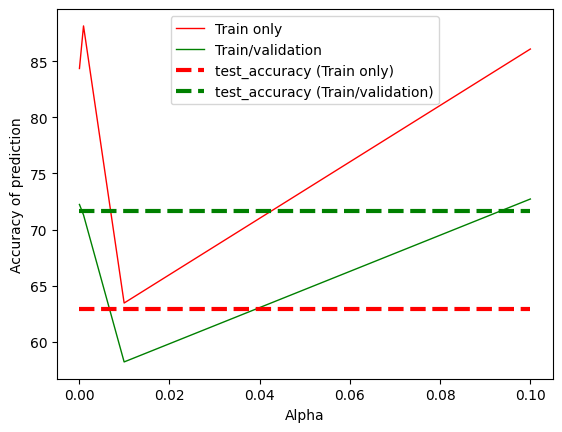

In [17]:
# plot scores
plt.plot(alphas, scores, color='red', label='Train only', linewidth=1)
plt.plot(alphas, scores_cv, color='green', label='Train/validation', linewidth=1)
plt.plot([0.0001, 0.1], [test_score, test_score], color='red', linestyle='dashed', label='test_accuracy (Train only)', linewidth=3)
plt.plot([0.0001, 0.1], [test_score_cv, test_score_cv], color='green', linestyle='dashed', label='test_accuracy (Train/validation)', linewidth=3)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Accuracy of prediction")

We tried to tune `alpha` parameter of `SGDClassifier` to choose best alpha for our model (and to see the difference between using validation set or not) by testing different values of alpha (\[0.0001, 0.001, 0.01, 0.1\]).
When testing accuracy of classifier with different value, 
- In 'train only' model, we used just train set. (Fit the model with train data set, and score the model with the same data)
- In 'train/validation' model, we divided the train set into train/validation set. (Fit the model with train data, and score the model with validation data)

With the alpha resulted in best accuracy score in each model, we predicted test set.
'Train only' model shows generally higher scores while tuing alpha, but accuracy on test set was lower. (same as train only vs train/test set testing). It seems that model learns train data while tuing parameters, resulting in overfitting on train data.

Regarding that in most cases we need to evaluate model and and fine-tune our model repeatedly, we could conclude that we need validation set to avoid using train set both in train and fine-tune testing. In that way, we would be able to find best-fit parameters in the model and predict well on new data. 

Next, we explored different types of methods of splitting data. 

### 1-3. Exploring different train/test (or train/validation/test) split method 

In [18]:
# random train-test split
from sklearn.model_selection import train_test_split
rnd_train_set, rnd_test_set = train_test_split(X_train, test_size=0.2, random_state=42)
print("number of samples in train set: ", len(rnd_train_set))
print("number of samples in test set: ", len(rnd_test_set))
print(rnd_train_set.index)

number of samples in train set:  18051
number of samples in test set:  4513
Index(['R_8542.jpg', 'O_8357.jpg', 'O_12498.jpg', 'O_287.jpg', 'O_10496.jpg',
       'O_7316.jpg', 'O_7573.jpg', 'R_7472.jpg', 'O_4486.jpg', 'R_8333.jpg',
       ...
       'O_2672.jpg', 'R_4856.jpg', 'O_4327.jpg', 'R_9598.jpg', 'O_8846.jpg',
       'O_9458.jpg', 'R_9108.jpg', 'O_354.jpg', 'O_10772.jpg', 'R_3906.jpg'],
      dtype='object', length=18051)


In [19]:
# stratified split (to maintain ratio between classes)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for strat_train_index, strat_test_index in split.split(X_train, y_train):
    strat_train_set = X_train.iloc[strat_train_index]
    strat_test_set = X_train.iloc[strat_test_index]
print("number of samples in train set: ", len(strat_train_set))
print("number of samples in test set: ", len(strat_test_set))
print(strat_train_set.index)

number of samples in train set:  18051
number of samples in test set:  4513
Index(['R_8008.jpg', 'R_962.jpg', 'O_5524.jpg', 'R_6994.jpg', 'O_8389.jpg',
       'R_912.jpg', 'O_9315.jpg', 'R_8646.jpg', 'O_6371.jpg', 'O_4173.jpg',
       ...
       'R_9838.jpg', 'R_1918.jpg', 'O_10388.jpg', 'O_8997.jpg', 'O_10596.jpg',
       'O_8925.jpg', 'O_7392.jpg', 'O_2883.jpg', 'O_11231.jpg', 'O_383.jpg'],
      dtype='object', length=18051)


In [20]:
# compare representatives of data
prop_table = pd.DataFrame({
    "Overall": y_train.value_counts() / len(y_train), 
    "Random" : y_train.loc[rnd_train_set.index].value_counts() / len(y_train.loc[rnd_train_set.index]), 
    "Stratified" : y_train.loc[strat_train_set.index].value_counts() / len(y_train.loc[strat_train_set.index])})
prop_table

,Overall,Random,Stratified
0,0.55686,0.554651,0.556867
1,0.44314,0.445349,0.443133


In [21]:
prop_table["Rand. %error"] = 100 * prop_table["Random"] / prop_table["Overall"] - 100
prop_table["Strat. %error"] = 100 * prop_table["Stratified"] / prop_table["Overall"] - 100
prop_table

,Overall,Random,Stratified,Rand. %error,Strat. %error
0,0.55686,0.554651,0.556867,-0.396827,0.001108
1,0.44314,0.445349,0.443133,0.498663,-0.001392


We could see that by using `sklearn.model_selection.StratifiedShuffleSplit` splited data still remain in the same proportion as of the original data set. 
Even if our data is not extremely skewed or unbalanced, we think it is still better to have train/validation/test set represent the original data well.

#### Implicit train/validation split
Also, we found that `sklearn.model_selection` module provide many splitter classes and model_validation classes which we could set cross validation splitting strategy as parameter. (e.g., `cross_val_score`). 

## 2. Experiments with evaluation Metrics:
- Accuracy, TP/FP rate, precision/recall, F measure, confusion matrix, ROC curve

Here, we used one of our sub-datasets to explore different evaluation metrics. 

In [21]:
# add label as last column to data
data_3 = np.append(data_3, y_train.values.reshape(-1, 1), axis=1)

print(data_3.shape)
print(data_3[:, :])

(22564, 1453)
[[1.         1.         1.         ... 1.         1.         0.        ]
 [0.94509804 0.94901961 0.96862745 ... 0.95686275 0.97647059 0.        ]
 [0.995965   0.995965   0.995965   ... 1.         1.         0.        ]
 ...
 [0.54081996 0.54081996 0.57219251 ... 0.57024793 0.52710258 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.94901961 0.94117647 0.94509804 ... 0.6600632  0.64009885 1.        ]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

# split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(data_3[:, :-1], data_3[:, -1], test_size=0.2, random_state=42)
train_set, test_set = train_test_split(data_3, test_size=0.2, random_state=42)

print(test_set[:])

# train model
sgd = SGDClassifier(max_iter=10000, tol=1e-3)
sgd.fit(train_set[:, :-1], train_set[:, -1])

# test model
y_pred = sgd.predict(test_set[:, :-1])
print(y_pred)

# check accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_set[:, -1], y_pred))

[[9.92748339e-01 9.36776860e-01 8.84346135e-01 ... 6.72257333e-02
  1.60103711e-02 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.58548047e-02 3.54804732e-02 5.69599741e-03 ... 3.30578512e-02
  7.28407065e-03 0.00000000e+00]
 ...
 [1.15629558e-01 1.75376762e-01 2.76794685e-01 ... 3.57316480e-03
  6.80602820e-04 1.00000000e+00]
 [9.33333333e-01 9.33333333e-01 9.33333333e-01 ... 8.98573975e-01
  9.17647059e-01 1.00000000e+00]
 [9.47245179e-01 8.08904554e-01 5.79865500e-01 ... 5.94336412e-01
  3.41200778e-01 0.00000000e+00]]
[0. 0. 0. ... 0. 1. 1.]
0.755816530024374


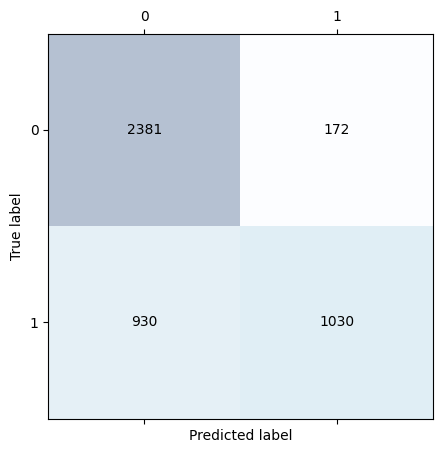

              precision    recall  f1-score   support

         0.0       0.72      0.93      0.81      2553
         1.0       0.86      0.53      0.65      1960

    accuracy                           0.76      4513
   macro avg       0.79      0.73      0.73      4513
weighted avg       0.78      0.76      0.74      4513



In [25]:
# check confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(test_set[:, -1], y_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# check precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(test_set[:, -1], y_pred))

AUC: 0.794


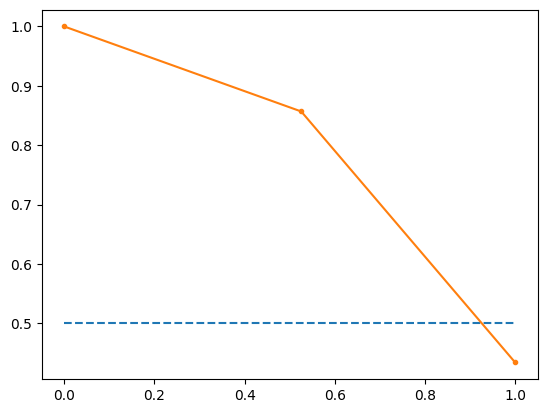

In [26]:
# calculate precision-recall AUC
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(test_set[:, -1], y_pred)

# calculate AUC
auc = auc(recall, precision)
print('AUC: %.3f' % auc)

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')

# show the plot
pyplot.show()

## 3. Implement Pipeline 

In [27]:
%store -r df_rgb_with_labels

In [73]:
# this data is unscaled
print("First sample :", df_rgb_with_labels.iloc[0])
print("Shape of unprocessed data: ", df_rgb_with_labels.shape)

First sample : pixels_1        255
pixels_2        255
pixels_3        255
pixels_4        255
pixels_5        255
               ... 
pixels_12285    255
pixels_12286    255
pixels_12287    255
pixels_12288    255
label             0
Name: O_1.jpg, Length: 12289, dtype: int64
Shape of unprocessed data:  (22564, 12289)


In [74]:
# generate small dataset to test pipeline
from sklearn.model_selection import train_test_split
some_sample_idx = np.random.randint(df_rgb_with_labels.shape[0], size=100)
some_sample = df_rgb_with_labels.iloc[some_sample_idx]
some_train_set, some_test_set = train_test_split(some_sample, test_size=0.2, random_state=42)

some_train_X, some_train_y = some_train_set.iloc[:, :-1], some_train_set.iloc[:, -1] 
some_test_X, some_test_y = some_test_set.iloc[:, :-1], some_test_set.iloc[:, -1]
print(some_train_X.shape, some_train_y.shape)
print(some_test_X.shape, some_test_y.shape)

(80, 12288) (80,)
(20, 12288) (20,)


### Process data without pipeline

In [75]:
# First, scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler_unpiped = MinMaxScaler()
some_train_scaled = pd.DataFrame(mmscaler_unpiped.fit_transform(some_train_X), columns=some_train_X.columns, index=some_train_X.index)
print(mmscaler_unpiped.scale_.shape)
print(some_train_scaled.head())

(12288,)
            pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  \
R_4201.jpg  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
O_58.jpg    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
R_2591.jpg  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
R_3308.jpg  0.882114  0.901639  0.960474  0.303644  0.408163  0.599206   
R_1831.jpg  0.967480  0.967213  0.968379  0.967611  0.967347  0.968254   

            pixels_7  pixels_8  pixels_9  pixels_10  ...  pixels_12279  \
R_4201.jpg  1.000000  1.000000  1.000000   1.000000  ...      0.992157   
O_58.jpg    1.000000  1.000000  1.000000   0.995918  ...      1.000000   
R_2591.jpg  1.000000  1.000000  1.000000   1.000000  ...      1.000000   
R_3308.jpg  0.160494  0.391667  0.680328   0.195918  ...      0.670588   
R_1831.jpg  0.967078  0.966667  0.967213   0.967347  ...      0.968627   

            pixels_12280  pixels_12281  pixels_12282  pixels_12283  \
R_4201.jpg      0.992157      0

In [76]:
# Feature extraction using PCA
from sklearn.decomposition import PCA
pca_unpipe = PCA(n_components=0.95)
some_train_pca = pca_unpipe.fit_transform(some_train_scaled)
print(some_train_pca.shape)

(80, 50)


In [77]:
# fit model
from sklearn.linear_model import SGDClassifier
sgd_unpipe = SGDClassifier()
sgd_unpipe.fit(some_train_pca, some_train_y)

SGDClassifier()

In [78]:
# transform test data to test
some_test_scaled = mmscaler_unpiped.transform(some_test_X)
some_test_pca = pca_unpipe.transform(some_test_scaled)
some_test_pred = sgd_unpipe.predict(some_test_pca)
test_score = sum(some_test_pred == some_test_y) / len(some_test_y)
print(test_score)

0.7


C:\Users\JHL\miniconda3\envs\f21dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### Process data using pipeline

In [79]:
#some_train_X, some_train_y = some_train_set.iloc[:, :-1], some_train_set.iloc[:, -1] 
#some_test_X, some_test_y = some_test_set.iloc[:, :-1], some_test_set.iloc[:, -1]

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('mmscaler', MinMaxScaler()), 
               ('pca', PCA(n_components=0.95)), 
               ('sgd', SGDClassifier())])
pipe.fit(some_train_X, some_train_y)
pipe.score(some_test_X, some_test_y)

0.7

In [81]:
pipe.get_params()

{'memory': None,
 'steps': [('mmscaler', MinMaxScaler()),
  ('pca', PCA(n_components=0.95)),
  ('sgd', SGDClassifier())],
 'verbose': False,
 'mmscaler': MinMaxScaler(),
 'pca': PCA(n_components=0.95),
 'sgd': SGDClassifier(),
 'mmscaler__clip': False,
 'mmscaler__copy': True,
 'mmscaler__feature_range': (0, 1),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__class_weight': None,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.0,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge',
 'sgd__max_iter': 1000,
 'sgd__n_iter_no_change': 5,
 'sgd__n_jobs': None,
 'sgd__penalty': 'l2',
 'sgd__power_t': 0.5,
 'sgd__random_state': None,
 'sgd__shuffle': True,
 'sgd__tol

Testing with different samples, we could see both processing data without pipeline and using pipeline bring the same result. Using pipeline wass much easier than keep all attributes of classes seperately, even with small set of steps. (Our data does not have any missing values, so we dont need to use any Imputer. Also, our data does not have any categorical feature, so we dont need to combine numerical pipeline with categorical one.)
It would be much efficient if more detailed processing required. 

## 4. Discussion
  - After including evaluation metrics/techniques, was there something new about data set? 
  - Could you reveal more information regarding data pre-processing or feature selection?
  - Which evaluation metrics are more important/reliable for image classification (your application)?
  - How do evaluation metrics work to indicate the performance related to different classes? 